# Recurrent Neural Networks

## Introduction

**Recurrent Neural Networks (RNNs)** constitute a specialized class of neural
architectures designed specifically for processing data sequences. Unlike conventional
feedforward neural networks, which process each input independently without retaining
information from previous inputs, RNNs incorporate memory mechanisms that allow them to
maintain and use information from previous time steps during the processing of new
inputs.

This memory capability is fundamental for numerous real-world applications. Consider, for
example, the reading comprehension process: to correctly interpret the meaning of a word
in a sentence, it is essential to consider the context provided by preceding words.
Similarly, RNNs process sequential information step by step, continuously updating their
internal state to reflect the accumulated knowledge of the sequence processed so far.
This characteristic makes them especially suitable tools for tasks involving temporal or
sequential data, such as natural language processing, time series analysis, speech
recognition, and text generation.

## The concept of sequences

Before delving into the internal workings of RNNs, it is essential to understand the
nature of sequential data and why it requires specialized treatment. A sequence is
defined as an ordered collection of elements where the order of appearance has intrinsic
meaning and directly affects the interpretation of the information. Unlike traditional
tabular data, where each sample can be considered independent, in sequences there is a
temporal or positional dependency between consecutive elements.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Examples of sequences in real life
print("=" * 60)
print("WHAT ARE SEQUENCES?")
print("=" * 60)

sequence_examples = {
    "Text": ["Hello", "how", "are", "you"],
    "Time series": [20, 22, 21, 23, 25, 24, 26],
    "Music": ["C", "D", "E", "F", "G"],
    "Video": ["Frame1", "Frame2", "Frame3", "Frame4"],
}

for type_name, sequence in sequence_examples.items():
    print(f"\n{type_name}:")
    print(f"  {' -> '.join(map(str, sequence))}")
    print(f"  Length: {len(sequence)}")

print("\n" + "-" * 60)
print("KEY CHARACTERISTIC: Order matters")
print("-" * 60)
print("'Hello how are you' makes sense")
print("'you are how Hello' doesn't make sense")
print("\nRNNs preserve and use this order information.")

WHAT ARE SEQUENCES?

Text:
  Hello -> how -> are -> you
  Length: 4

Time series:
  20 -> 22 -> 21 -> 23 -> 25 -> 24 -> 26
  Length: 7

Music:
  C -> D -> E -> F -> G
  Length: 5

Video:
  Frame1 -> Frame2 -> Frame3 -> Frame4
  Length: 4

------------------------------------------------------------
KEY CHARACTERISTIC: Order matters
------------------------------------------------------------
'Hello how are you' makes sense
'you are how Hello' doesn't make sense

RNNs preserve and use this order information.


## Building a simple RNN from scratch

To deeply understand the internal workings of recurrent neural networks, it is
instructive to implement a simplified version from its mathematical foundations. This
pedagogical approach allows explicitly visualizing how information flows through the
network and how the hidden state that acts as the system's memory is maintained.

The basic architecture of an RNN is based on a recurrent equation that updates the hidden
state at each time step. This hidden state $h_t$ at time $t$ is calculated as a nonlinear
function of the current input $x_t$ and the previous hidden state $h_{t-1}$.
Mathematically, this relationship is expressed as:

$$h_t = \tanh(W_x x_t + W_h h_{t-1} + b)$$

where $W_x$ represents the weight matrix associated with the input, $W_h$ the recurrent
weight matrix that connects the previous state with the current one, $b$ the bias vector,
and $\tanh$ the hyperbolic tangent activation function that introduces nonlinearity and
keeps the hidden state values in a bounded range.

In [2]:
class SimpleRNN:
    """
    An extremely simple RNN for educational purposes.
    Processes a sequence of numbers step by step.
    """

    def __init__(self, input_size=1, hidden_size=3):
        """
        Args:
            input_size: Dimension of each input element
            hidden_size: Size of the hidden state (the "memory")
        """
        self.hidden_size = hidden_size

        # Weights (initialized randomly small)
        # Weights for current input
        self.W_input = np.random.randn(hidden_size, input_size) * 0.01

        # Weights for previous state (the memory)
        self.W_hidden = np.random.randn(hidden_size, hidden_size) * 0.01

        # Bias
        self.bias = np.zeros((hidden_size, 1))

        print("Simple RNN created")
        print(f"  - Input size: {input_size}")
        print(f"  - Hidden size: {hidden_size}")
        print(f"  - Input weights: {self.W_input.shape}")
        print(f"  - Hidden weights: {self.W_hidden.shape}")

    def step(self, x, h_prev):
        """
        Processes ONE step of the sequence.

        Args:
            x: Current input (number)
            h_prev: Previous hidden state (the memory)

        Returns:
            New hidden state
        """
        # Convert input to correct shape
        x = np.array([[x]])

        # The magic RNN formula:
        # new_state = tanh(W_input * input + W_hidden * previous_state + bias)
        h_new = np.tanh(
            np.dot(self.W_input, x) + np.dot(self.W_hidden, h_prev) + self.bias
        )

        return h_new

    def process_sequence(self, sequence, verbose=True):
        """
        Processes a complete sequence, step by step.

        Args:
            sequence: List of numbers
            verbose: Whether to show the process

        Returns:
            List of all hidden states
        """
        # Initial state (empty memory)
        h = np.zeros((self.hidden_size, 1))
        states = []

        if verbose:
            print("\n" + "=" * 60)
            print("PROCESSING SEQUENCE STEP BY STEP")
            print("=" * 60)
            print(f"Input sequence: {sequence}")
            print(f"Initial state (empty memory):\n{h.flatten()}\n")

        for t, x in enumerate(sequence):
            if verbose:
                print(f" Step {t + 1} ")
                print(f"Input: {x}")
                print(f"Previous state: {h.flatten()}")

            # Process one step
            h = self.step(x, h)
            states.append(h.copy())

            if verbose:
                print(f"New state: {h.flatten()}")
                print()

        if verbose:
            print("=" * 60)
            print("SEQUENCE COMPLETED")
            print("=" * 60)
            print(f"Final state (accumulated memory):\n{h.flatten()}")

        return states


# Usage example
print("\n" + "=" * 60)
print("EXAMPLE: Processing a simple sequence")
print("=" * 60)

# Create RNN
rnn = SimpleRNN(input_size=1, hidden_size=3)

# Example sequence
sequence = [1.0, 2.0, 3.0]

# Process
states = rnn.process_sequence(sequence, verbose=True)


EXAMPLE: Processing a simple sequence
Simple RNN created
  - Input size: 1
  - Hidden size: 3
  - Input weights: (3, 1)
  - Hidden weights: (3, 3)

PROCESSING SEQUENCE STEP BY STEP
Input sequence: [1.0, 2.0, 3.0]
Initial state (empty memory):
[0. 0. 0.]

 Step 1 
Input: 1.0
Previous state: [0. 0. 0.]
New state: [ 0.00865486 -0.00327648 -0.00389234]

 Step 2 
Input: 2.0
Previous state: [ 0.00865486 -0.00327648 -0.00389234]
New state: [ 0.01738876 -0.00648656 -0.00775594]

 Step 3 
Input: 3.0
Previous state: [ 0.01738876 -0.00648656 -0.00775594]
New state: [ 0.02612014 -0.00969623 -0.01161931]

SEQUENCE COMPLETED
Final state (accumulated memory):
[ 0.02612014 -0.00969623 -0.01161931]


## Visualization of the memory mechanism

Understanding the dynamic behavior of RNNs is facilitated by visualizing the evolution of
the hidden state throughout the processing of a sequence. The hidden state acts as a
feature vector that encodes relevant information from all elements processed so far.
Observing how each component of this vector changes in response to new inputs allows
intuiting what kind of patterns the network is learning to detect and remember.

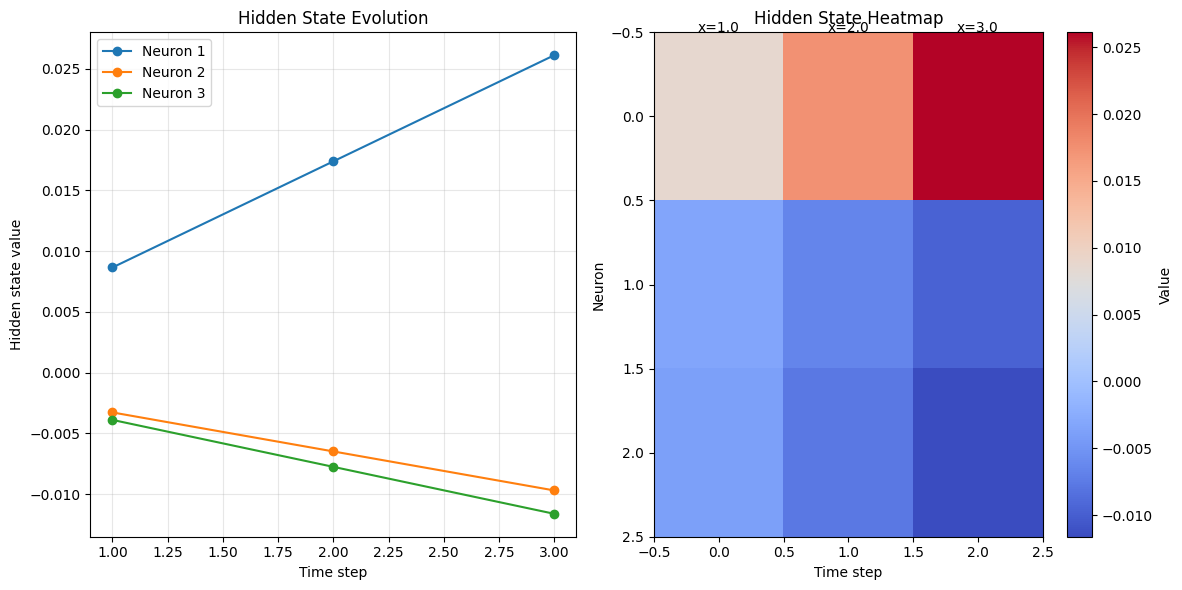


Interpretation:
- Each line represents a neuron in the hidden state
- Observe how values change with each new input
- The final state contains information from the ENTIRE sequence


In [3]:
def visualize_hidden_states(sequence, states):
    """
    Visualizes how the hidden state changes at each step.
    """
    plt.figure(figsize=(12, 6))

    # Prepare data
    states_array = np.array([s.flatten() for s in states])
    num_steps = len(states)
    num_neurons = states_array.shape[1]

    # Line plot
    plt.subplot(1, 2, 1)
    for i in range(num_neurons):
        plt.plot(
            range(1, num_steps + 1),
            states_array[:, i],
            marker="o",
            label=f"Neuron {i+1}",
        )

    plt.xlabel("Time step")
    plt.ylabel("Hidden state value")
    plt.title("Hidden State Evolution")
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Heatmap
    plt.subplot(1, 2, 2)
    plt.imshow(states_array.T, aspect="auto", cmap="coolwarm")
    plt.colorbar(label="Value")
    plt.xlabel("Time step")
    plt.ylabel("Neuron")
    plt.title("Hidden State Heatmap")

    # Add input values
    for i, val in enumerate(sequence):
        plt.text(i, -0.5, f"x={val}", ha="center")

    plt.tight_layout()
    plt.show()

    print("\nInterpretation:")
    print("- Each line represents a neuron in the hidden state")
    print("- Observe how values change with each new input")
    print("- The final state contains information from the ENTIRE sequence")


# Visualize
visualize_hidden_states([1.0, 2.0, 3.0], states)

## Sequence prediction with RNNs

Once the theoretical foundations and basic implementation are established, it is
pertinent to apply RNNs to a concrete prediction task. The problem of predicting the next
element of a sequence constitutes a fundamental use case that illustrates the ability of
these networks to capture temporal patterns and make inferences based on historical
context.

In this scenario, the RNN processes an input sequence element by element, updating its
internal state at each step. Once the complete sequence is processed, the final hidden
state contains a compressed representation of all relevant information. This state is
then used to generate a prediction of the next value through an additional output layer
that transforms the hidden state into the desired output space.


EXAMPLE: Predict the next number

Training data:
  [1, 2, 3] -> 4
  [2, 3, 4] -> 5
  [3, 4, 5] -> 6
  [4, 5, 6] -> 7
  [5, 6, 7] -> 8
RNN Predictor created
  Input: 1, Hidden: 10, Output: 1

Training RNN...
Epochs: 100, Learning rate: 0.01
  Epoch 20/100 - Error: 38.0338
  Epoch 40/100 - Error: 38.6755
  Epoch 60/100 - Error: 39.3282
  Epoch 80/100 - Error: 39.9919
  Epoch 100/100 - Error: 40.6670


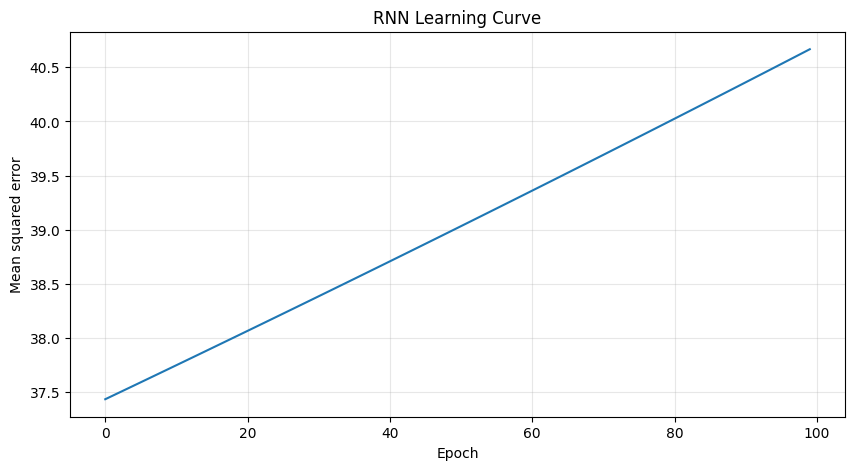


TESTING PREDICTIONS
Sequence: [1, 2, 3]
Prediction: -0.00
Expected: 4

Sequence: [5, 6, 7]
Prediction: -0.36
Expected: 8

Sequence: [10, 11, 12]
Prediction: -0.66
Expected: 13



In [4]:
class RNNPredictor:
    """
    Simple RNN to predict the next element of a sequence.
    """

    def __init__(self, input_size=1, hidden_size=10, output_size=1):
        self.hidden_size = hidden_size

        # Weights for recurrent layer
        self.W_input = np.random.randn(hidden_size, input_size) * 0.1
        self.W_hidden = np.random.randn(hidden_size, hidden_size) * 0.1
        self.b_hidden = np.zeros((hidden_size, 1))

        # Weights for output layer
        self.W_output = np.random.randn(output_size, hidden_size) * 0.1
        self.b_output = np.zeros((output_size, 1))

        print(f"RNN Predictor created")
        print(f"  Input: {input_size}, Hidden: {hidden_size}, Output: {output_size}")

    def forward(self, sequence):
        """
        Forward propagation: processes the sequence and generates predictions.

        Args:
            sequence: List of values

        Returns:
            prediction: Prediction of the next value
            states: List of hidden states
        """
        h = np.zeros((self.hidden_size, 1))
        states = []

        # Process each element of the sequence
        for x in sequence:
            x = np.array([[x]])

            # Update hidden state
            h = np.tanh(
                np.dot(self.W_input, x) + np.dot(self.W_hidden, h) + self.b_hidden
            )
            states.append(h.copy())

        # Generate prediction based on last state
        prediction = np.dot(self.W_output, h) + self.b_output

        return prediction[0, 0], states

    def simple_train(self, sequences, targets, epochs=100, learning_rate=0.01):
        """
        Very simplified training (for demonstration only).

        Args:
            sequences: List of input sequences
            targets: List of target values (next number)
            epochs: Number of iterations
            learning_rate: Learning speed
        """
        print("\nTraining RNN...")
        print(f"Epochs: {epochs}, Learning rate: {learning_rate}")

        error_history = []

        for epoch in range(epochs):
            total_error = 0

            for sequence, target in zip(sequences, targets):
                # Prediction
                prediction, _ = self.forward(sequence)

                # Error
                error = target - prediction
                total_error += error**2

                # Simple weight update (simplified gradient descent)
                # In reality, this requires backpropagation through time (BPTT)
                # but here we use a very simplified version
                self.W_output += learning_rate * error * 0.01
                self.b_output += learning_rate * error * 0.01

            avg_error = total_error / len(sequences)
            error_history.append(avg_error)

            if (epoch + 1) % 20 == 0:
                print(f"  Epoch {epoch + 1}/{epochs} - Error: {avg_error:.4f}")

        return error_history

    def predict(self, sequence):
        """Predicts the next value in the sequence."""
        prediction, states = self.forward(sequence)
        return prediction


# Example: Predict numbers in a sequence
print("\n" + "=" * 60)
print("EXAMPLE: Predict the next number")
print("=" * 60)

# Training data: simple sequences
# For example: [1, 2, 3] -> 4, [2, 3, 4] -> 5
training_sequences = [[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7]]

training_targets = [4, 5, 6, 7, 8]

print("\nTraining data:")
for seq, target in zip(training_sequences, training_targets):
    print(f"  {seq} -> {target}")

# Create and train RNN
rnn_predictor = RNNPredictor(input_size=1, hidden_size=10, output_size=1)
errors = rnn_predictor.simple_train(training_sequences, training_targets, epochs=100)

# Visualize training
plt.figure(figsize=(10, 5))
plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Mean squared error")
plt.title("RNN Learning Curve")
plt.grid(True, alpha=0.3)
plt.show()

# Test predictions
print("\n" + "=" * 60)
print("TESTING PREDICTIONS")
print("=" * 60)

test_sequences = [[1, 2, 3], [5, 6, 7], [10, 11, 12]]

for seq in test_sequences:
    pred = rnn_predictor.predict(seq)
    print(f"Sequence: {seq}")
    print(f"Prediction: {pred:.2f}")
    print(f"Expected: {seq[-1] + 1}")
    print()

## Implementation with PyTorch

While manual implementation of RNNs provides deep understanding of their internal
mechanisms, in professional practice deep learning frameworks are used that offer
optimized and efficient implementations. PyTorch, one of the most widely used frameworks
in research and production, provides predefined modules for RNNs that encapsulate all the
complexity of gradient calculation through backpropagation through time (BPTT) and offer
GPU acceleration.

The use of these professional implementations not only significantly reduces development
time, but also guarantees numerical correctness and computational efficiency. PyTorch
automatically handles complex aspects such as weight initialization, gradient calculation
through time, and management of variable-length sequences.


RNN WITH PYTORCH

Data generated: 100 examples
Example sequence: [ 7  8  9 10 11] -> 12

Shape of X: torch.Size([100, 5, 1])
Shape of y: torch.Size([100, 1])

Model created:
RNNPyTorch(
  (rnn): RNN(1, 20, batch_first=True)
  (fc): Linear(in_features=20, out_features=1, bias=True)
)

Training with PyTorch...
Epoch 10/50 - Loss: 345.6696
Epoch 20/50 - Loss: 104.2540
Epoch 30/50 - Loss: 37.0908
Epoch 40/50 - Loss: 15.0748
Epoch 50/50 - Loss: 7.1070


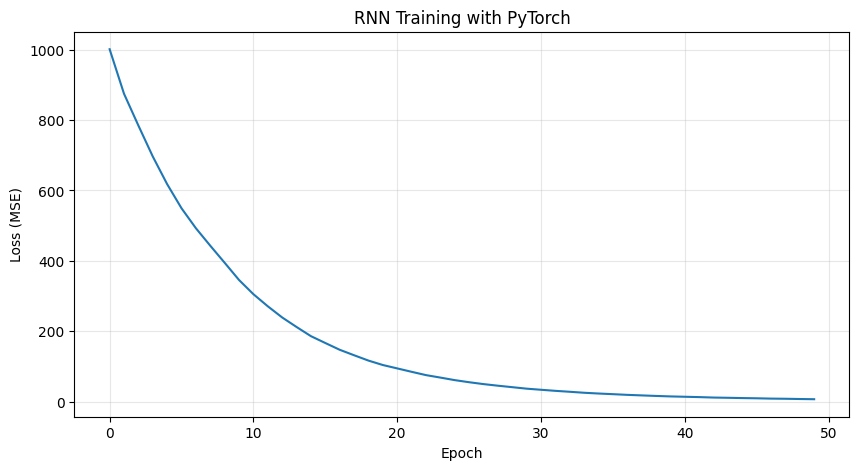


TESTING TRAINED MODEL

Sequence: [10, 11, 12, 13, 14]
Prediction: 14.11
Expected: 15

Sequence: [25, 26, 27, 28, 29]
Prediction: 29.26
Expected: 30

Sequence: [100, 101, 102, 103, 104]
Prediction: 44.53
Expected: 105


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim


class RNNPyTorch(nn.Module):
    """
    Professional RNN using PyTorch.
    """

    def __init__(self, input_size, hidden_size, output_size):
        super(RNNPyTorch, self).__init__()

        self.rnn = nn.RNN(
            input_size=input_size, hidden_size=hidden_size, batch_first=True
        )

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        """
        Forward propagation.

        Args:
            x: Tensor of shape (batch, sequence, features)

        Returns:
            Model output
        """
        out, h_n = self.rnn(x)
        last_output = out[:, -1, :]
        prediction = self.fc(last_output)
        return prediction


def train_rnn_pytorch(model, train_loader, epochs=50, lr=0.01):
    """
    Training function for PyTorch RNN.
    """
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    history = []

    print("\nTraining with PyTorch...")

    for epoch in range(epochs):
        epoch_loss = 0

        for sequences, targets in train_loader:
            optimizer.zero_grad()
            predictions = model(sequences)
            loss = criterion(predictions, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        history.append(avg_loss)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

    return history


print("\n" + "=" * 60)
print("RNN WITH PYTORCH")
print("=" * 60)


def create_sequence_data(num_examples=100):
    """Creates example data: sequence -> next number"""
    X = []
    y = []

    for i in range(num_examples):
        start = np.random.randint(0, 50)
        sequence = list(range(start, start + 5))
        next_val = start + 5
        X.append(sequence)
        y.append(next_val)

    return np.array(X), np.array(y)


X, y = create_sequence_data(100)

print(f"\nData generated: {len(X)} examples")
print(f"Example sequence: {X[0]} -> {y[0]}")

X_tensor = torch.FloatTensor(X).unsqueeze(-1)
y_tensor = torch.FloatTensor(y).unsqueeze(-1)

print(f"\nShape of X: {X_tensor.shape}")
print(f"Shape of y: {y_tensor.shape}")

from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=10, shuffle=True)

model = RNNPyTorch(input_size=1, hidden_size=20, output_size=1)

print(f"\nModel created:")
print(model)

history = train_rnn_pytorch(model, train_loader, epochs=50, lr=0.01)

plt.figure(figsize=(10, 5))
plt.plot(history)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("RNN Training with PyTorch")
plt.grid(True, alpha=0.3)
plt.show()

print("\n" + "=" * 60)
print("TESTING TRAINED MODEL")
print("=" * 60)

model.eval()
with torch.no_grad():
    test_sequences = [
        [10, 11, 12, 13, 14],
        [25, 26, 27, 28, 29],
        [100, 101, 102, 103, 104],
    ]

    for seq in test_sequences:
        input_tensor = torch.FloatTensor(seq).unsqueeze(0).unsqueeze(-1)
        prediction = model(input_tensor)
        print(f"\nSequence: {seq}")
        print(f"Prediction: {prediction.item():.2f}")
        print(f"Expected: {seq[-1] + 1}")